In [1]:
library(ez)
library(car)
library(ggplot2)
library(ARTool)
# require(BayesianFirstAid)

library(lmerTest)
library(lme4)

library(report)
library(BayesFactor)
library(brms)
library(cmdstanr)
check_cmdstan_toolchain(fix = TRUE, quiet = TRUE)
library(posterior)
library(bayesplot)
color_scheme_set("brightblue")
set_cmdstan_path("/home/ra73net/cmdstan/") #Set path to cmdstan 


library(parameters)
library(effectsize)
library(insight)
library(see)

check_cmdstan_toolchain()

library(tidybayes)
library(modelr)

library(BayesFM)
library(bayestestR)

library(tidyverse)

library(brmstools)

Loading required package: carData

Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step


Loading required package: coda

************
Welcome to BayesFactor 0.9.12-4.4. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************

Loading required package: Rcpp

Loading 'brms' package (version 2.18.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:lme4’:

    ngrps


The following object is masked from ‘package:stats’:

    ar


This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan



In [4]:
df <- read.csv("../dataframes/R_Danger.csv")
df$PID <- as.factor(df$PID)
df$Perspective <- factor(df$Perspective, levels = c("Self", "Other", "Robot"))
df$Item <- as.factor(df$Item)
df$Owning <- as.factor(df$Owning)

In [5]:
colnames(df)

[1] "PID"              "Item"             "Perspective"      "Danger"          
 [5] "Owning"           "Familiar"         "ATI"              "CookingFrequency"
 [9] "CookingAlone"     "CookingTogether"  "CookingExpertise"

In [6]:
model <- Danger ~ Perspective + (Perspective|Item)+(Perspective|PID)
# model <- Danger ~ Perspective + Familiar + (Perspective|Item)+(Perspective|PID) Change Familar to the Factors you want to observe
b <- brm(formula = model, df,cores = 32, backend = "cmdstanr", chains = 4, iter = 20000, warmup=20000*0.1)
dp <- describe_posterior(b, test = c("pd"), ci_method = "HDI", centrality = "median", effects = "fixed")
dp$pb <- 1 - dp$pd
dp

<built-in>: fatal error: opening dependency file stan/src/stan/model/model_header.d: Permission denied
compilation terminated.


<built-in>: fatal error: opening dependency file src/cmdstan/main.d: Permission denied
compilation terminated.


Start sampling



Running MCMC with 4 chains, at most 32 in parallel...

Chain 1 Iteration:     1 / 20000 [  0%]  (Warmup) 
Chain 2 Iteration:     1 / 20000 [  0%]  (Warmup) 
Chain 3 Iteration:     1 / 20000 [  0%]  (Warmup) 
Chain 4 Iteration:     1 / 20000 [  0%]  (Warmup) 
Chain 1 Iteration:   100 / 20000 [  0%]  (Warmup) 
Chain 2 Iteration:   100 / 20000 [  0%]  (Warmup) 
Chain 3 Iteration:   100 / 20000 [  0%]  (Warmup) 
Chain 4 Iteration:   100 / 20000 [  0%]  (Warmup) 
Chain 2 Iteration:   200 / 20000 [  1%]  (Warmup) 
Chain 4 Iteration:   200 / 20000 [  1%]  (Warmup) 
Chain 3 Iteration:   200 / 20000 [  1%]  (Warmup) 
Chain 2 Iteration:   300 / 20000 [  1%]  (Warmup) 
Chain 4 Iteration:   300 / 20000 [  1%]  (Warmup) 
Chain 3 Iteration:   300 / 20000 [  1%]  (Warmup) 
Chain 3 Iteration:   400 / 20000 [  2%]  (Warmup) 
Chain 4 Iteration:   400 / 20000 [  2%]  (Warmup) 
Chain 2 Iteration:   400 / 20000 [  2%]  (Warmup) 
Chain 4 Iteration:   500 / 20000 [  2%]  (Warmup) 
Chain 2 Iteration:   500 / 

,Parameter,Median,CI,CI_low,CI_high,pd,Rhat,ESS,pb
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,b_Intercept,17.2099,0.95,14.610500,19.77590,1.0000000,1.000374,9434.458,0.000000000
2,b_PerspectiveOther,1.6562,0.95,0.413465,2.90082,0.9953889,1.000062,48454.794,0.004611111
3,b_PerspectiveRobot,16.2982,0.95,13.767600,18.70410,1.0000000,1.000046,36832.959,0.000000000


# Item Effect Analysis

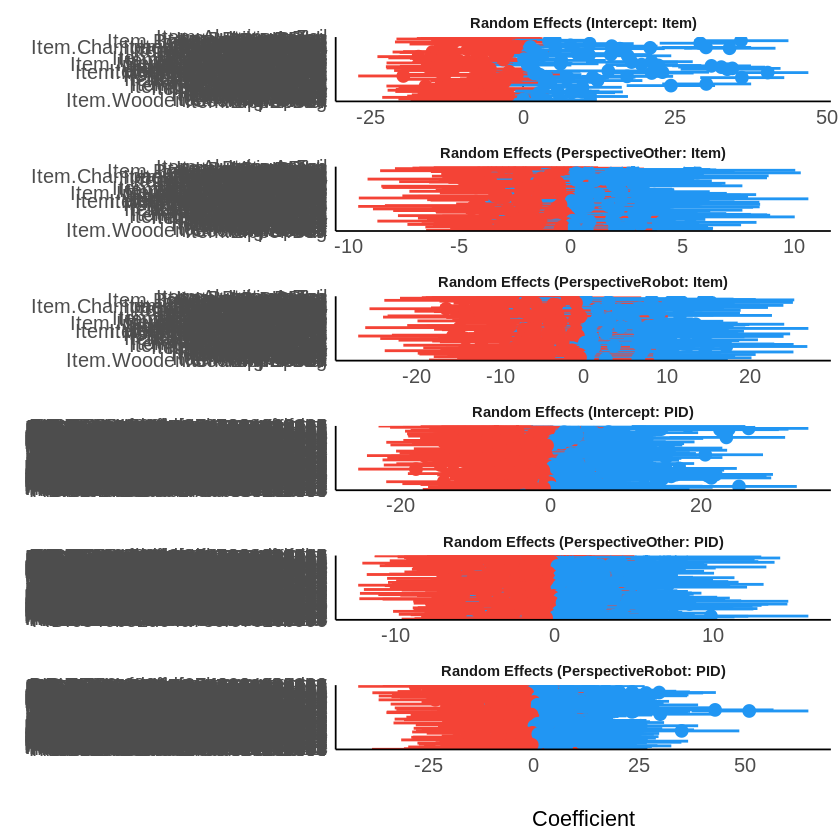

In [7]:
# Random effekt over item plots
result <- model_parameters(b, effects = "random", component='conditional', group_level=TRUE)
plot(result, plot=FALSE)

In [8]:
min(df$Danger)

[1] 0

In [9]:
max(df$Danger)

[1] 100

In [10]:
contrasts(df$Perspective)

,Other,Robot
Self,0,0
Other,1,0
Robot,0,1


In [12]:
summary(b)$random

,Estimate,Est.Error,l-95% CI,u-95% CI,Rhat,Bulk_ESS,Tail_ESS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sd(Intercept),14.0776559,0.9048100,12.41559750,15.9522200,1.000208,15914.431,31399.51
sd(PerspectiveOther),3.2060813,0.6329622,1.98969900,4.4706535,1.000065,35128.690,43879.66
sd(PerspectiveRobot),9.6730836,0.8244697,8.13489750,11.3691025,1.000031,30907.938,48551.69
"cor(Intercept,PerspectiveOther)",0.4547136,0.1749889,0.09636292,0.7776287,1.000041,40316.702,39565.54
"cor(Intercept,PerspectiveRobot)",0.3613883,0.0976243,0.16313000,0.5450680,1.000038,30848.643,42788.56
"cor(PerspectiveOther,PerspectiveRobot)",0.9146356,0.0680889,0.73971250,0.9935230,1.000694,9003.729,14797.77
,Estimate,Est.Error,l-95% CI,u-95% CI,Rhat,Bulk_ESS,Tail_ESS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sd(Intercept),9.3834059,0.56104729,8.330165750,10.5281075,1.000045,36283.732,49697.086


In [14]:
str(coef(b))


List of 2
 $ Item: num [1:153, 1:4, 1:3] 7.47 6.25 13.49 14.33 3.2 ...
  ..- attr(*, "dimnames")=List of 3
  .. ..$ : chr [1:153] "Aluminum Foil" "Apron" "Bag" "Baking Dish" ...
  .. ..$ : chr [1:4] "Estimate" "Est.Error" "Q2.5" "Q97.5"
  .. ..$ : chr [1:3] "Intercept" "PerspectiveOther" "PerspectiveRobot"
 $ PID : num [1:300, 1:4, 1:3] 1.83 5.02 35.54 7.34 10.11 ...
  ..- attr(*, "dimnames")=List of 3
  .. ..$ : chr [1:300] "558ef31ffdf99b3a64863830" "573116d21efe74000e308d26" "58051593bd8a970001fdf4e5" "589295bdd8cdf10001d885b2" ...
  .. ..$ : chr [1:4] "Estimate" "Est.Error" "Q2.5" "Q97.5"
  .. ..$ : chr [1:3] "Intercept" "PerspectiveOther" "PerspectiveRobot"


In [18]:
t <- b %>%
  spread_draws(b_PerspectiveRobot, r_Item[Item,Perspective]) %>%
filter(Perspective != "PerspectiveOther") %>%
ungroup() %>%
group_by(Perspective, Item)  %>%
compare_levels(r_Item, by = Perspective) %>%
group_by(Item) %>%
median_qi(mean = r_Item, .width = c(.95))  

Warning message:
“`gather_()` was deprecated in tidyr 1.2.0.
ℹ Please use `gather()` instead.
ℹ The deprecated feature was likely used in the tidybayes package.
  Please report the issue at <https://github.com/mjskay/tidybayes/issues/new>.”


In [19]:
t

Item,mean,.lower,.upper,.width,.point,.interval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Aluminum.Foil,0.6035500,-14.5368230,15.5453276,0.95,median,qi
Apron,1.6558200,-12.5969870,15.6593484,0.95,median,qi
Bag,-4.7822590,-19.1376164,9.4632827,0.95,median,qi
Baking.Dish,0.9810575,-12.1394650,14.0860295,0.95,median,qi
Baking.Paper,1.8831000,-12.8203877,16.4237567,0.95,median,qi
Baller,8.1266450,-6.6762155,23.0713890,0.95,median,qi
Beer.Mug,13.8538100,-0.4105166,28.5177175,0.95,median,qi
Blender,5.8461050,-8.4191460,20.0764845,0.95,median,qi
Blow.Torch,-21.3520500,-37.7670995,-5.2106875,0.95,median,qi


In [20]:
t %>% filter(.upper < 0) 

Item,mean,.lower,.upper,.width,.point,.interval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Blow.Torch,-21.35205,-37.76710,-5.210688,0.95,median,qi
Boil.Over.Preventer,-18.59516,-32.89671,-4.690835,0.95,median,qi
Cheese.Cleaver,-21.61770,-37.42627,-6.070665,0.95,median,qi
Chef's.Knife,-22.52335,-38.48057,-6.512460,0.95,median,qi
Chopper,-23.56346,-39.43545,-8.123111,0.95,median,qi
Curler,-16.36839,-31.91144,-1.113701,0.95,median,qi
Grater,-31.11669,-45.94913,-16.924542,0.95,median,qi
Jar.Opener,-18.43708,-31.31508,-5.630830,0.95,median,qi
Kitchen.Knife,-20.92751,-34.95615,-6.862475,0.95,median,qi


In [21]:
# positives
t %>%
filter(.lower > 0)

Item,mean,.lower,.upper,.width,.point,.interval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Bottle,15.31339,0.3356045,31.10280,0.95,median,qi
Bowl,23.31765,9.4275670,37.44271,0.95,median,qi
Ladle,15.73204,2.0956363,29.80854,0.95,median,qi
Water.Glass,17.07229,3.0864034,31.50474,0.95,median,qi


In [22]:
t %>% filter(mean < 2 & mean > -2)

Item,mean,.lower,.upper,.width,.point,.interval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Aluminum.Foil,0.6035500,-14.53682,15.54533,0.95,median,qi
Apron,1.6558200,-12.59699,15.65935,0.95,median,qi
Baking.Dish,0.9810575,-12.13946,14.08603,0.95,median,qi
Baking.Paper,1.8831000,-12.82039,16.42376,0.95,median,qi
Canister,-0.2586320,-15.50317,14.67794,0.95,median,qi
Carving.Fork,-1.5896500,-17.37484,14.61145,0.95,median,qi
Cocktail.Muddler,1.1571900,-12.65951,14.92224,0.95,median,qi
Cookie.Cutter,-1.9203800,-17.58774,13.54688,0.95,median,qi
Corer,-0.3892500,-15.10931,14.77489,0.95,median,qi


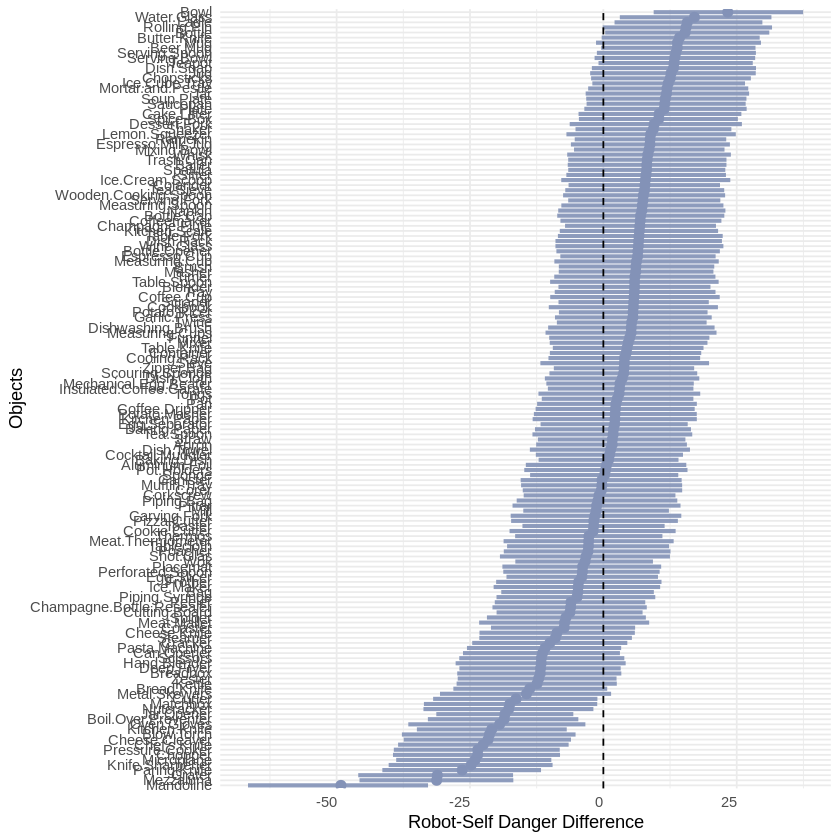

In [48]:
b %>%
  spread_draws(b_PerspectiveRobot, r_Item[Item,Perspective]) %>%
filter(Perspective != "PerspectiveOther") %>%
ungroup() %>%
group_by(Perspective, Item)  %>%
compare_levels(r_Item, by = Perspective) %>%
group_by(Item) %>%
median_qi(mean = r_Item, .width = c(.95))  %>%
  ggplot(aes(y = reorder(Item,mean) , x = mean, xmin = .lower, xmax = .upper)) +
  geom_pointinterval(interval_colour='#8392B7', interval_alpha=0.9, point_colour='#8392B7') +
geom_vline(xintercept=c(0), linetype="dashed")+

# coord_flip() + 
theme_minimal()+
theme(axis.text.x = element_text(angle = 0, hjust=1),
     ) +

labs(x="Robot-Self Danger Difference", y="Objects")
ggsave('./out/ItemRandomChange.pdf', width=40,height=50, unit='cm')
# pivot_wider(names_from=c(Item), values_from=r_Item)

In [ ]:
forest(b)

In [ ]:
conditional_effects(b)

In [31]:
my_colors <- c('#6599FF','#FFAD33','#683B96','#098D6D','#F07ADB', '#FF523F')

barcolor <- '#8392B7'

In [32]:
w <- 3
h <- 3

# Baysian Analysis and Plots

## Legend only (Deprecated)

In [27]:
plot_exp_persp <- plot(conditional_effects(b, effects="Perspective"), plot=FALSE)[[1]] +

  scale_y_continuous(limits = c(0, 100) ,expand = c(0,0)) +
    theme_minimal() +
  theme(
      legend.position = "right", #else bottom
      legend.title = element_blank(),
     panel.grid.minor = element_blank(),
      axis.line.y = element_blank(),axis.text.y = element_blank(),axis.ticks.y = element_blank(),axis.title.y=element_blank(),
      axis.title.x=element_blank(),
      panel.spacing = unit(0.5, "cm"),
      strip.placement = "outside",
      ) +
scale_color_manual(values=c("Self"=my_colors[1], "Other"=my_colors[2], "Robot"=my_colors[3])) +
scale_fill_manual(values=c("Self"=my_colors[1], "Other"=my_colors[2], "Robot"=my_colors[3]))
# ggsave(plot_exp_persp, file="./out/plot_CookingExpertise_Perspective_noaxis_legendright.pdf", width=3.2, height=h)  

leg <- get_legend(plot_exp_persp) # Convert to a ggplot and print as_ggplot(leg)
# plot.mpg <- plot.mpg + theme(legend.position='none')
leg <- as_ggplot(leg)

ggsave(leg, file="./cameraready/plot_Legend.pdf", width=1, height=h)  
leg

ERROR: Error in is_missing(values): object 'my_colors' not found


## Scenario / Perspective only

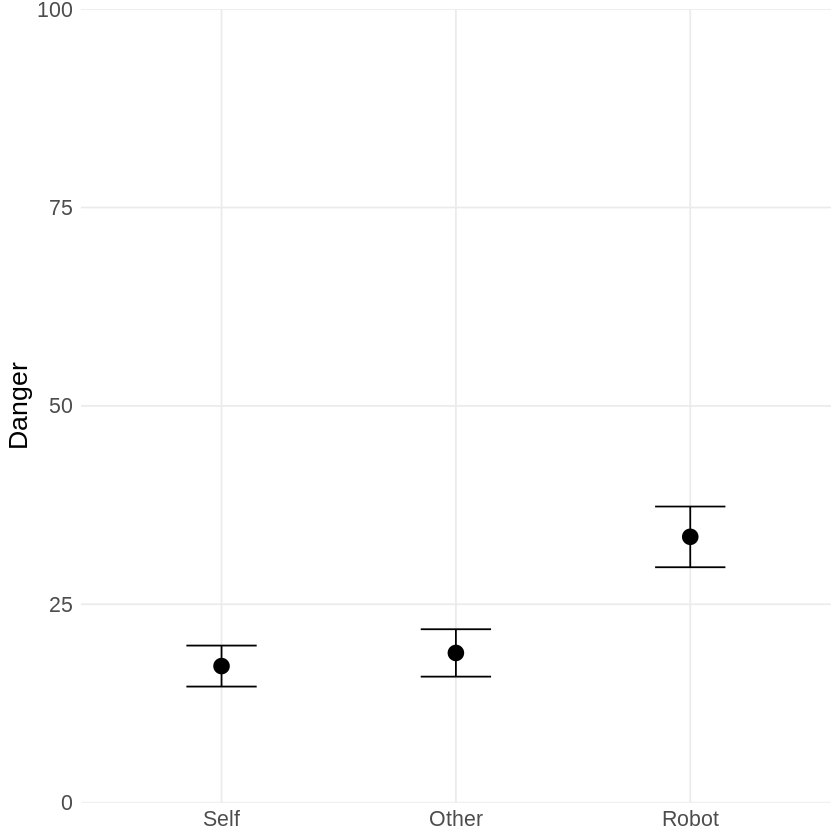

In [36]:
plot_persp <- plot(conditional_effects(b, effects="Perspective"), plot=FALSE)[[1]] +
# scale_color_manual(values=c("Self"=my_colors[1], "Other"=my_colors[2], "Robot"=my_colors[3])) +
# scale_fill_manual(values=c("Self"=my_colors[1], "Other"=my_colors[2], "Robot"=my_colors[3])) + 
  scale_y_continuous(limits = c(0, 100) ,expand = c(0,0)) +
    theme_minimal() +
  theme(
      legend.position = "bottom", #else bottom

      legend.title = element_blank(),
    panel.grid.minor = element_blank(),
      axis.title.x=element_blank(),
      text = element_text(size=16),

      panel.spacing = unit(0.5, "cm"),
      strip.placement = "outside") 

ggsave(plot_persp, file="./out/plot_Perspective_noaxis.pdf", width=w, height=h)  
plot_persp

# END

# One Plot

In [ ]:
library(patchwork)
p <- plot_ati + plot_fam + plot_own + plot_ati_persp + plot_fam_persp + plot_own_persp + plot_layout(nrow=2, ncol=3)

In [ ]:
conditional_effects(b)

In [ ]:
ggplot(b)

In [ ]:
plot(b)

In [ ]:
r <- report(b)
r
summary(r)

In [ ]:
# Random effekt over item plots
result <- model_parameters(b, effects = "all", component = "random")
plot(result)


In [ ]:
ggplot(df, aes(x= Perspective, y=Danger)) +
                geom_boxplot() 

In [ ]:
ggplot(df, aes(x= Self_Owning, y=Danger)) +
                geom_boxplot() 

In [ ]:
ggplot(df, aes(x= Self_Familiar, y=Danger)) +
                geom_point() +facet_wrap(vars(Self_Owning))

In [ ]:
ggplot(df, aes(x= ATI, y=Danger)) +
                geom_point() +facet_wrap(vars(Self_Owning))

In [ ]:
m0 = lmer(Danger ~ 1 + (1|PID) + (1|Item), df)
m1 = lmer(Danger ~ 1 + Perspective + (1|PID)+ (1|Item), df)
m2 = lmer(Danger ~ 1 + Perspective + Self_Owning + (1|PID)+ (1|Item), df)
m3 = lmer(Danger ~ 1 + Perspective + Self_Owning + Self_Familiar + (1|PID)+ (1|Item), df)
m4 = lmer(Danger ~ 1 + Perspective + Self_Owning + Self_Familiar + ATI + (1|PID)+ (1|Item), df)
anova(m0,m1,m2,m3,m4)

In [ ]:
m0 = lmer(Danger ~ 1 + (1|PID) + (1|Item), df)
m1 = lmer(Danger ~ 1 + Perspective + (1|PID)+ (1|Item), df)
m2 = lmer(Danger ~ 1 + Perspective + Self_Owning + (1|PID)+ (1|Item), df)
m3 = lmer(Danger ~ 1 + Perspective + Self_Familiar + (1|PID), df)
m.OF = lmer(Danger ~ Perspective + Self_Owning + Self_Familiar + (1|PID)+ (1|Item), df)
m.Own = lmer(Danger ~ 1 + Perspective + Self_Owning + (1|PID)+ (1|Item), df)
m.ATI = lmer(Danger ~ Perspective + ATI + (1|PID)+ (1|Item), df)
m.Own.ATI = lmer(Danger ~ 1 + Perspective + Self_Owning + ATI + (1|PID)+ (1|Item), df)
m.OAF = lmer(Danger ~ Perspective + Self_Owning + Self_Familiar + ATI + (1|PID)+ (1|Item), df)

In [ ]:
anova(m0,m1,m2,m3, m.OF,  m.ATI,m.Own, m.Own.ATI, m.OAF)

In [ ]:
bf = anovaBF(Danger ~ Perspective * Item + PID, data = df, whichRandom='PID')

In [ ]:
bf

In [ ]:
plot(bf[2] / bf[4])

In [ ]:
plot(bf[])

In [ ]:
bf1 = anovaBF(Danger ~ Perspective + PID, data = df, whichRandom='PID')

In [ ]:
plot(bf1)

In [ ]:
df2 <- read.csv("./dataframes/R_Danger_Perspective_ONLY.csv")
df2$PID <- as.factor(df2$PID)
df2$Perspective <- factor(df2$Perspective, levels = c("Self", "Other", "Robot"))

In [ ]:
bf = ttestBF(x = df2$Danger)
bf

In [ ]:
chains = posterior(bf, iterations = 1000)
summary(chains)

In [ ]:
chains2 = recompute(chains, iterations = 10000)
plot(chains2[,1:2])

In [ ]:
bf = ttestBF(formula = Danger ~ Perspective, data = df2[df2$Perspective %in% c("Self","Robot"),])
bf

In [ ]:
bf = ttestBF(formula = Danger ~ Perspective, data = df2[df2$Perspective %in% c("Self","Other"),])
bf

In [ ]:
bf = ttestBF(formula = Danger ~ Perspective, data = df2[df2$Perspective %in% c("Other","Robot"),])
bf

In [ ]:
bf = ttestBF(formula = Danger ~ Perspective, data = df2[df2$Perspective %in% c("Self","Other"),])
bf

In [ ]:
nrow(df2[df2$Perspective %in% c("Robot"),])

In [ ]:
nrow(df2[df2$Perspective %in% c("Self"),])

In [ ]:
nrow(df2[df2$Perspective %in% c("Other"),])

In [ ]:
bf = ttestBF(formula = Danger ~ Perspective, data = df2[df2$Perspective %in% c("Other","Robot"),])
bf

In [ ]:
chains = posterior(bf, iterations = 10000)
plot(chains[,2])

In [ ]:
summary(aov(Danger ~ Perspective + Error(PID), data=df2))

In [ ]:
bf2 = anovaBF(Danger ~ Perspective + PID, data = df2, whichRandom='PID')

In [ ]:
bf2

In [ ]:
plot(bf2)

In [ ]:
m0 = lmer(Danger ~ 1  + (1|PID) + (1|Item), df)
m0.0 = lmer(Danger ~ 1 + Item + (1|PID), df)
m0.1 = lmer(Danger ~ 1 + Perspective + (1|PID)+ (1|Item), df)
anova(m0, m0.0, m0.1)

In [ ]:
report(m0)

In [ ]:
report(m1)

In [ ]:
summary(m1)

In [ ]:
df2 <- read.csv("./dataframes/R_Danger_Perspective_ONLY.csv")
df2$PID <- as.factor(df2$PID)
df2$Perspective <- factor(df2$Perspective, levels = c("Self", "Other", "Robot"))

In [ ]:
colnames(df2) <- c('PID','Perspective','Danger')
#df2
hist(df2$Danger)

In [ ]:
bayes.wilcox.test

In [ ]:
friedman.test(df2$Danger, df2$Perspective, df2$PID)

In [ ]:
pairwise.wilcox.test(df2$Danger, df2$Perspective, paired=TRUE, p.adjust.method="bonf")

In [ ]:
pairwise.wilcox.test(df2$Danger, df2$Perspective, p.adjust.method="bonf")

In [ ]:
pairwise.wilcox.test

In [ ]:
dfArt <- read.csv("./dataframes/R_Danger.art.csv")

In [ ]:
library(ggplot2)
# Basic violin plot
p <- ggplot(df, aes(x=Perspective, y=Danger)) + 
  geom_boxplot()
p

In [ ]:
# ART ANCOVA with Item as covariate
summary(aov(dfArt$aligned.Danger..for.Perspective~ dfArt$Item * dfArt$Perspective + Error(dfArt$PID)))

In [ ]:
lm <- aov(dfArt$aligned.Danger..for.Item ~ dfArt$Item * dfArt$Perspective + 1|dfArt$PID)
Anova(lm, type=3)

In [ ]:
hist(dfArt$aligned.Danger..for.Item)
hist(dfArt$aligned.Danger..for.Perspective)
hist(dfArt$aligned.Danger..for.Item.Perspective)

In [ ]:
hist(dfArt$ART.Danger..for.Item)
hist(dfArt$ART.Danger..for.Perspective)
hist(dfArt$ART.Danger..for.Item.Perspective)

In [ ]:
dfArt

In [ ]:
m = art(Danger~Perspective+(1|PID), data=df)
anova(m)

In [ ]:
m = art(Danger~Perspective*Item+(1|PID), data=df)
anova(m)

In [ ]:
shapiro.test(df$Danger)

In [ ]:
friedman.test(df$Danger, df$Perspective, df$PID)

In [ ]:
pairwise.wilcox.test(df$Danger, df$Perspective)